# Convergence Analysis

Analyze convergence of fair spread estimates across different RNG methods as N_SIMS increases.

**Fixed parameters:**
- K = 5 (5th to default)
- COPULA = 'gaussian'

**Varying:**
- RNG_METHOD: pseudo, pseudo_antithetic, halton, sobol
- N_SIMS: 1,000 → 250,000

In [1]:
import papermill as pm
import scrapbook as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time

# Create output directory
Path('output/convergence').mkdir(parents=True, exist_ok=True)

## Define Parameter Grid

In [2]:
# Fixed parameters
K = 3
COPULA = 'gaussian'

# RNG methods to compare
RNG_METHODS = ['pseudo', 'pseudo_antithetic', 'halton', 'sobol']

# Simulation counts (logarithmic progression)
N_SIMS_LIST = [1_000, 2_500, 5_000, 10_000, 25_000, 50_000, 100_000, 250_000]

# Total runs
total_runs = len(RNG_METHODS) * len(N_SIMS_LIST)
print(f"RNG Methods: {RNG_METHODS}")
print(f"N_SIMS values: {N_SIMS_LIST}")
print(f"Total runs: {total_runs}")

RNG Methods: ['pseudo', 'pseudo_antithetic', 'halton', 'sobol']
N_SIMS values: [1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000]
Total runs: 32


## Run Convergence Study

In [3]:
# Execute notebook for each combination
output_notebooks = []
start_time = time.time()
skipped = 0

for rng_method in RNG_METHODS:
    for n_sims in N_SIMS_LIST:
        output_path = f'output/convergence/{COPULA}_k{K}_{rng_method}_n{n_sims}.ipynb'
        
        # Skip if already exists
        if Path(output_path).exists():
            print(f"Skipping: RNG={rng_method}, N={n_sims:,} (exists)")
            output_notebooks.append(output_path)
            skipped += 1
            continue
        
        print(f"Running: RNG={rng_method}, N={n_sims:,}...", end=' ', flush=True)
        run_start = time.time()
        
        try:
            pm.execute_notebook(
                'cds_pricing.ipynb',
                output_path,
                parameters={
                    'K': K,
                    'COPULA': COPULA,
                    'RNG_METHOD': rng_method,
                    'N_SIMS': n_sims
                },
                kernel_name='python3'
            )
            output_notebooks.append(output_path)
            elapsed = time.time() - run_start
            print(f'✓ ({elapsed:.1f}s)')
        except Exception as e:
            print(f'✗ Error: {e}')

total_elapsed = time.time() - start_time
print(f"\nCompleted {len(output_notebooks)} / {total_runs} runs in {total_elapsed:.1f}s")
print(f"Skipped {skipped} existing runs")

Running: RNG=pseudo, N=1,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (11.9s)
Running: RNG=pseudo, N=2,500... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (9.6s)
Running: RNG=pseudo, N=5,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.0s)
Running: RNG=pseudo, N=10,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.6s)
Running: RNG=pseudo, N=25,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (12.3s)
Running: RNG=pseudo, N=50,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (15.4s)
Running: RNG=pseudo, N=100,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (21.1s)
Running: RNG=pseudo, N=250,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (39.5s)
Running: RNG=pseudo_antithetic, N=1,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (9.5s)
Running: RNG=pseudo_antithetic, N=2,500... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (9.6s)
Running: RNG=pseudo_antithetic, N=5,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.0s)
Running: RNG=pseudo_antithetic, N=10,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.5s)
Running: RNG=pseudo_antithetic, N=25,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (12.2s)
Running: RNG=pseudo_antithetic, N=50,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (15.3s)
Running: RNG=pseudo_antithetic, N=100,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (21.3s)
Running: RNG=pseudo_antithetic, N=250,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (39.4s)
Running: RNG=halton, N=1,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (9.7s)
Running: RNG=halton, N=2,500... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (9.8s)
Running: RNG=halton, N=5,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.0s)
Running: RNG=halton, N=10,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.6s)
Running: RNG=halton, N=25,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (12.5s)
Running: RNG=halton, N=50,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (15.6s)
Running: RNG=halton, N=100,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (21.5s)
Running: RNG=halton, N=250,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (40.6s)
Running: RNG=sobol, N=1,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (9.7s)
Running: RNG=sobol, N=2,500... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.0s)
Running: RNG=sobol, N=5,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.3s)
Running: RNG=sobol, N=10,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (10.7s)
Running: RNG=sobol, N=25,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (12.2s)
Running: RNG=sobol, N=50,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (15.5s)
Running: RNG=sobol, N=100,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (21.2s)
Running: RNG=sobol, N=250,000... 

Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

✓ (39.0s)

Completed 32 / 32 runs in 517.0s
Skipped 0 existing runs


## Extract Results

In [4]:
# Extract results from executed notebooks
results = []

for nb_path in output_notebooks:
    try:
        nb = sb.read_notebook(nb_path)
        results.append({
            'K': nb.scraps['K'].data,
            'Copula': nb.scraps['COPULA'].data,
            'RNG_Method': nb.scraps['RNG_METHOD'].data,
            'N_SIMS': nb.scraps['N_SIMS'].data,
            'Fair_Spread_bps': nb.scraps['fair_spread'].data,
            'SE_bps': nb.scraps.get('se_bps', {}).data if 'se_bps' in nb.scraps else None,
        })
    except Exception as e:
        print(f"Error reading {nb_path}: {e}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(['RNG_Method', 'N_SIMS'])
print(f"Collected {len(results_df)} results")
display(results_df)

Collected 32 results


,K,Copula,RNG_Method,N_SIMS,Fair_Spread_bps,SE_bps
16,3,gaussian,halton,1000,46.147325,7.430998
17,3,gaussian,halton,2500,42.774818,4.535751
18,3,gaussian,halton,5000,44.252707,3.262329
19,3,gaussian,halton,10000,43.530507,2.289190
20,3,gaussian,halton,25000,43.240192,1.443228
21,3,gaussian,halton,50000,42.623825,1.013180
22,3,gaussian,halton,100000,42.096310,0.712018
23,3,gaussian,halton,250000,41.574983,0.447644
0,3,gaussian,pseudo,1000,56.238210,8.251949
1,3,gaussian,pseudo,2500,51.666858,4.987007


In [5]:
# Save results
results_df.to_csv('output/convergence_results.csv', index=False)
print("Saved to output/convergence_results.csv")

Saved to output/convergence_results.csv


## Convergence Plot

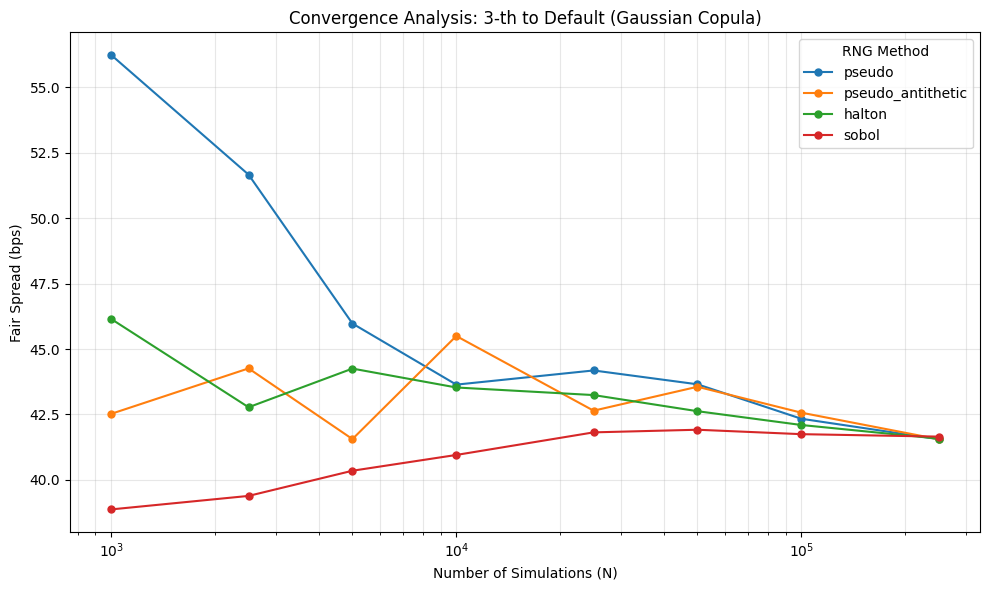

In [6]:
# Plot fair spread vs N_SIMS for each RNG method
fig, ax = plt.subplots(figsize=(10, 6))

for rng_method in RNG_METHODS:
    subset = results_df[results_df['RNG_Method'] == rng_method]
    ax.plot(subset['N_SIMS'], subset['Fair_Spread_bps'], 
            marker='o', label=rng_method, linewidth=1.5, markersize=5)

ax.set_xscale('log')
ax.set_xlabel('Number of Simulations (N)')
ax.set_ylabel('Fair Spread (bps)')
ax.set_title(f'Convergence Analysis: {K}-th to Default ({COPULA.capitalize()} Copula)')
ax.legend(title='RNG Method')
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('output/convergence_plot.png', dpi=150)
plt.show()

## Standard Error Convergence

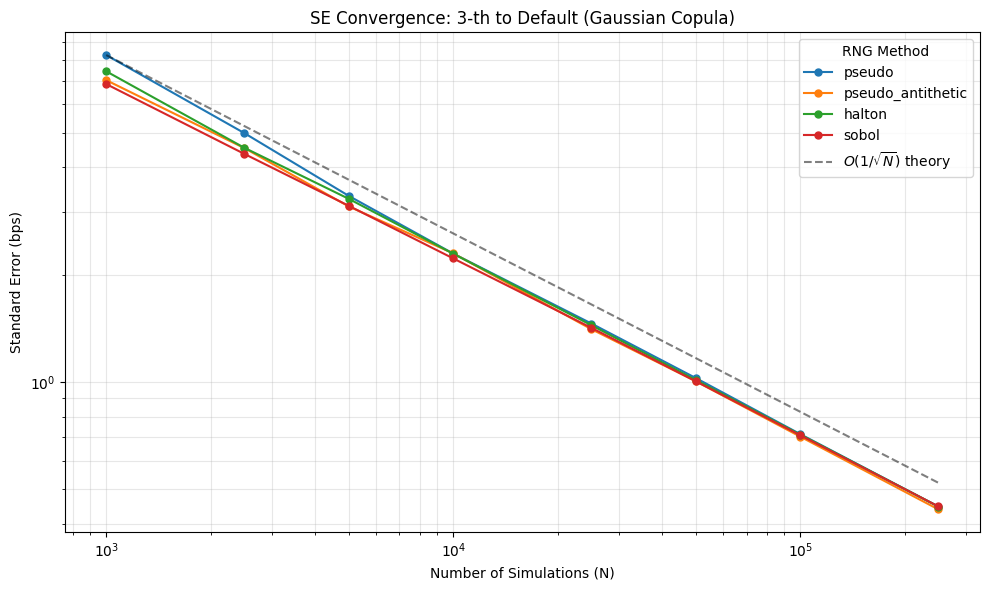

In [7]:
# Plot SE vs N_SIMS for each RNG method (log-log scale)
# This shows the actual Monte Carlo standard error convergence

fig, ax = plt.subplots(figsize=(10, 6))

for rng_method in RNG_METHODS:
    subset = results_df[results_df['RNG_Method'] == rng_method]
    subset = subset.dropna(subset='SE_bps')  # Skip if SE not available
    if len(subset) > 0:
        ax.plot(subset['N_SIMS'], subset['SE_bps'], 
                marker='o', label=rng_method, linewidth=1.5, markersize=5)

# Add theoretical O(1/sqrt(N)) reference line
n_range = np.array([1000, 250000])
# Scale to match pseudo-random at N=1000
pseudo_1k = results_df[(results_df['RNG_Method'] == 'pseudo') & (results_df['N_SIMS'] == 1000)]['SE_bps']
if len(pseudo_1k) > 0 and pseudo_1k.iloc[0] is not None:
    scale = pseudo_1k.iloc[0]
    ax.plot(n_range, scale * np.sqrt(1000/n_range), 'k--', alpha=0.5, 
            label=r'$O(1/\sqrt{N})$ theory')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Simulations (N)')
ax.set_ylabel('Standard Error (bps)')
ax.set_title(f'SE Convergence: {K}-th to Default ({COPULA.capitalize()} Copula)')
ax.legend(title='RNG Method')
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('output/se_convergence_plot.png', dpi=150)
plt.show()

## Convergence Rate Analysis

In [8]:
# Estimate convergence rate by measuring deviation from final value
# Use largest N as "true" value reference for each method

convergence_analysis = []

for rng_method in RNG_METHODS:
    subset = results_df[results_df['RNG_Method'] == rng_method].sort_values('N_SIMS')
    
    # Reference value (largest N)
    ref_value = subset['Fair_Spread_bps'].iloc[-1]
    
    for _, row in subset.iterrows():
        error = abs(row['Fair_Spread_bps'] - ref_value)
        convergence_analysis.append({
            'RNG_Method': rng_method,
            'N_SIMS': row['N_SIMS'],
            'Fair_Spread_bps': row['Fair_Spread_bps'],
            'Abs_Error': error,
            'Ref_Value': ref_value
        })

conv_df = pd.DataFrame(convergence_analysis)
display(conv_df)

,RNG_Method,N_SIMS,Fair_Spread_bps,Abs_Error,Ref_Value
0,pseudo,1000,56.238210,14.684585,41.553625
1,pseudo,2500,51.666858,10.113233,41.553625
2,pseudo,5000,45.975354,4.421729,41.553625
3,pseudo,10000,43.639356,2.085731,41.553625
4,pseudo,25000,44.181477,2.627852,41.553625
5,pseudo,50000,43.652252,2.098627,41.553625
6,pseudo,100000,42.334940,0.781315,41.553625
7,pseudo,250000,41.553625,0.000000,41.553625
8,pseudo_antithetic,1000,42.523877,0.972104,41.551773
9,pseudo_antithetic,2500,44.259899,2.708125,41.551773


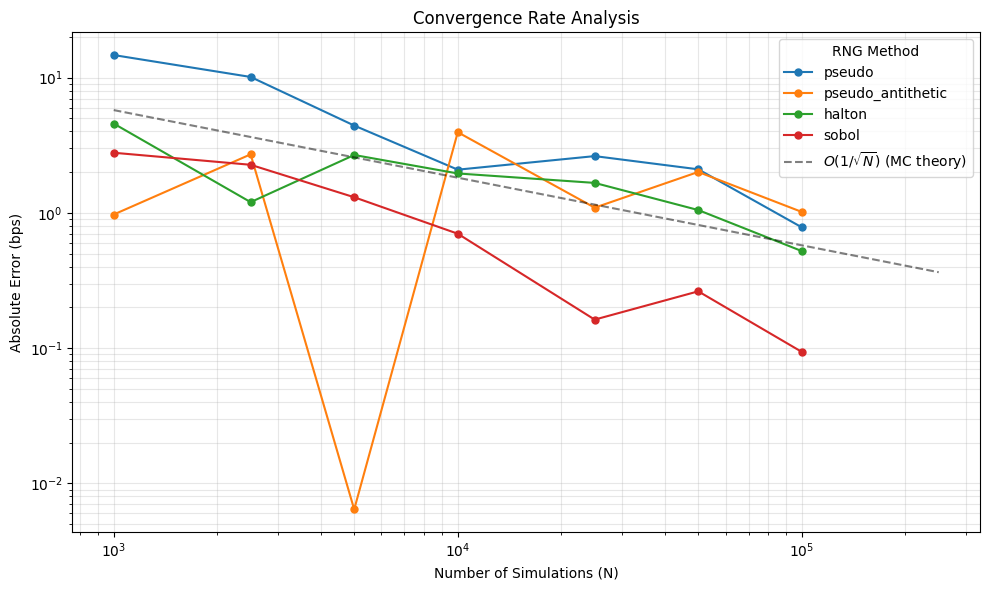

In [9]:
# Plot absolute error vs N (log-log to see convergence rate)
fig, ax = plt.subplots(figsize=(10, 6))

for rng_method in RNG_METHODS:
    subset = conv_df[conv_df['RNG_Method'] == rng_method]
    # Exclude the reference point (error = 0)
    subset = subset[subset['Abs_Error'] > 0]
    if len(subset) > 0:
        ax.plot(subset['N_SIMS'], subset['Abs_Error'], 
                marker='o', label=rng_method, linewidth=1.5, markersize=5)

# Add theoretical convergence lines
n_range = np.array([1000, 250000])
scale = conv_df[conv_df['N_SIMS'] == 1000]['Abs_Error'].mean()
if scale > 0:
    ax.plot(n_range, scale * np.sqrt(1000/n_range), 'k--', alpha=0.5, label=r'$O(1/\sqrt{N})$ (MC theory)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Simulations (N)')
ax.set_ylabel('Absolute Error (bps)')
ax.set_title('Convergence Rate Analysis')
ax.legend(title='RNG Method')
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('output/convergence_rate_plot.png', dpi=150)
plt.show()

## Summary Statistics

In [10]:
# Pivot table: spread at each N for each method
pivot = results_df.pivot(
    index='N_SIMS',
    columns='RNG_Method',
    values='Fair_Spread_bps'
)[RNG_METHODS]  # Ensure column order

print("Fair Spread (bps) by N_SIMS and RNG Method:")
display(pivot.style.format('{:.2f}'))

Fair Spread (bps) by N_SIMS and RNG Method:


RNG_Method,pseudo,pseudo_antithetic,halton,sobol
N_SIMS,,,,
1000,56.24,42.52,46.15,38.87
2500,51.67,44.26,42.77,39.39
5000,45.98,41.56,44.25,40.35
10000,43.64,45.50,43.53,40.95
25000,44.18,42.64,43.24,41.81
50000,43.65,43.56,42.62,41.92
100000,42.33,42.57,42.10,41.75
250000,41.55,41.55,41.57,41.65


In [11]:
# Relative deviation from mean at largest N
final_values = results_df[results_df['N_SIMS'] == N_SIMS_LIST[-1]]
mean_final = final_values['Fair_Spread_bps'].mean()
std_final = final_values['Fair_Spread_bps'].std()

print(f"\nAt N = {N_SIMS_LIST[-1]:,}:")
print(f"  Mean fair spread: {mean_final:.2f} bps")
print(f"  Std across methods: {std_final:.4f} bps")
print(f"  Range: {final_values['Fair_Spread_bps'].min():.2f} - {final_values['Fair_Spread_bps'].max():.2f} bps")


At N = 250,000:
  Mean fair spread: 41.58 bps
  Std across methods: 0.0473 bps
  Range: 41.55 - 41.65 bps
